In [25]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
# from keras.preprocessing import sequence
# from keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [26]:
!apt-get update
!apt-get install -y libsndfile1

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


# Importing Data 

                                              Ravdess Dataframe
Here is the filename identifiers as per the official RAVDESS website:

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

In [27]:
#preparing data set

ravdess = '../speech/audio_speech_actors_01-24/'
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [28]:
Crema = '../AudioWAV/'
Tess = '../TESS Toronto emotional speech set data/'
Savee = '../ALL/'

# preprocessing

**Ravdees**

In [29]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)
    

In [30]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-01-01-01-01-24.wav
03
../speech/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [31]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())



  Emotions                                               Path
0  neutral  ../speech/audio_speech_actors_01-24/Actor_01/0...
1  neutral  ../speech/audio_speech_actors_01-24/Actor_01/0...
2  neutral  ../speech/audio_speech_actors_01-24/Actor_01/0...
3  neutral  ../speech/audio_speech_actors_01-24/Actor_01/0...
4  neutral  ../speech/audio_speech_actors_01-24/Actor_01/0...
______________________________________________
      Emotions                                               Path
1435  surprise  ../speech/audio_speech_actors_01-24/Actor_24/0...
1436  surprise  ../speech/audio_speech_actors_01-24/Actor_24/0...
1437  surprise  ../speech/audio_speech_actors_01-24/Actor_24/0...
1438  surprise  ../speech/audio_speech_actors_01-24/Actor_24/0...
1439  surprise  ../speech/audio_speech_actors_01-24/Actor_24/0...
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dty

**Crema DataFrame**

CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified).

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())


**TESS dataset**

There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

In [33]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = np.array(part.split('_'))
        if part.size==3:
            part=part[2]
            if part=='ps' or part=='surprised':
                file_emotion.append('surprise')
            else:
                file_emotion.append(part)
            file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())



Emotions
surprise    402
angry       400
disgust     400
fear        400
happy       400
neutral     400
sad         400
Name: count, dtype: int64


**SAVEE Dataset**

Context
The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. This is supported by the cross-cultural studies of Ekman [6] and studies of automatic emotion recognition tended to focus on recognizing these [12]. We added neutral to provide recordings of 7 emotion categories. The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences.

Content
This results in a total of 120 utterances per speaker, for example:

Common: She had your dark suit in greasy wash water all year.
Anger: Who authorized the unlimited expense account?
Disgust: Please take this dirty table cloth to the cleaners for me.
Fear: Call an ambulance for medical assistance.
Happiness: Those musicians harmonize marvelously.
Sadness: The prospect of cutting back spending is an unpleasant one for any governor.
Surprise: The carpet cleaners shampooed our oriental rug.
Neutral: The best way to learn is to solve extra problems.

In [34]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())


Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64


**Integration**

In [35]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
# data_path.to_csv("data_path.csv",index=False)
data_path = pd.read_csv("data_path.csv")
data_path.head()

,Emotions,Path
0,neutral,../speech/audio_speech_actors_01-24/Actor_01/0...
1,neutral,../speech/audio_speech_actors_01-24/Actor_01/0...
2,neutral,../speech/audio_speech_actors_01-24/Actor_01/0...
3,neutral,../speech/audio_speech_actors_01-24/Actor_01/0...
4,neutral,../speech/audio_speech_actors_01-24/Actor_01/0...


In [36]:
print(data_path.Emotions.value_counts())


Emotions
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: count, dtype: int64


>*                           Data Visualisation and Exploration

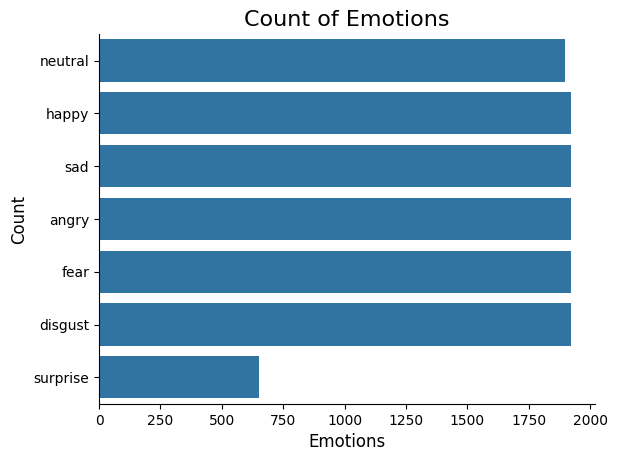

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [38]:
data,sr = librosa.load(file_path[0])
sr

22050

In [39]:
ipd.Audio(data,rate=sr)

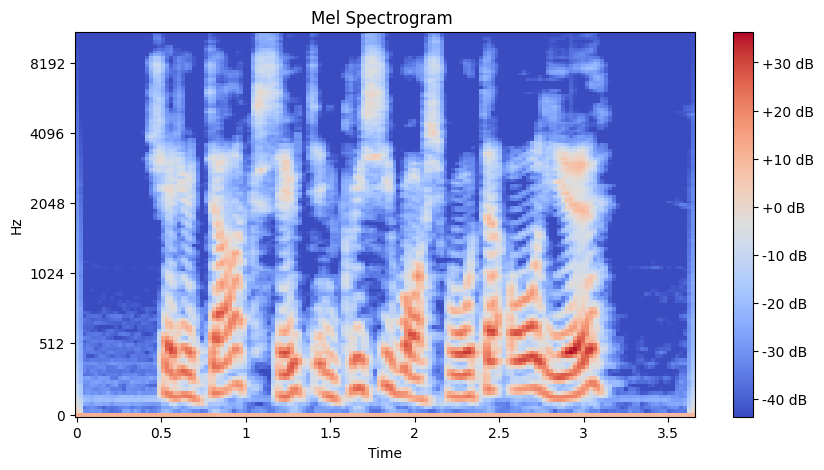

In [40]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB');

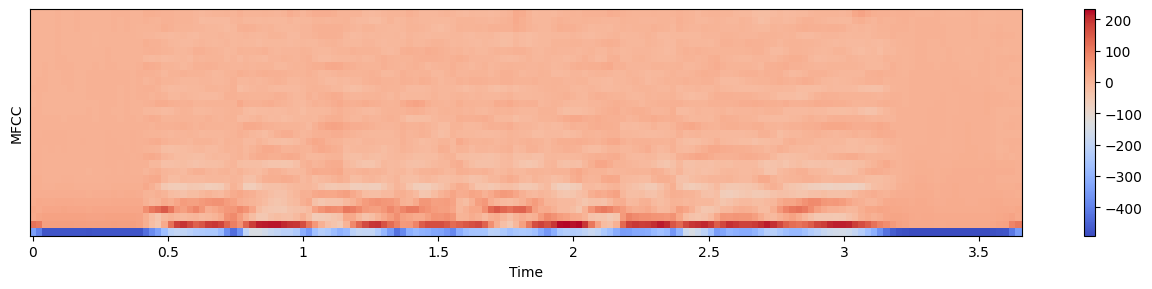

In [41]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [42]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)
# , sampling_rate, pitch_factor

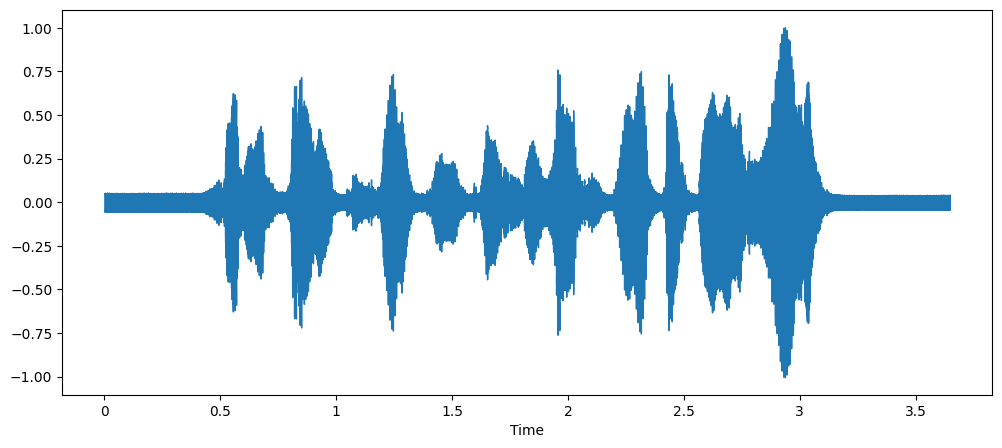

In [43]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

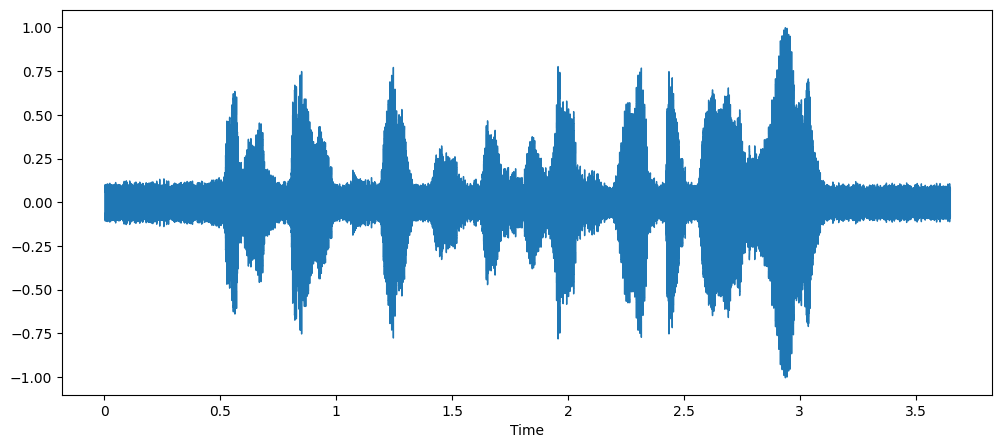

In [44]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [45]:
# # STRETCHED AUDIO
# x = stretch(data)
# plt.figure(figsize=(12, 5))
# librosa.display.waveshow(y=x, sr=sr)
# ipd.Audio(x, rate=sr)

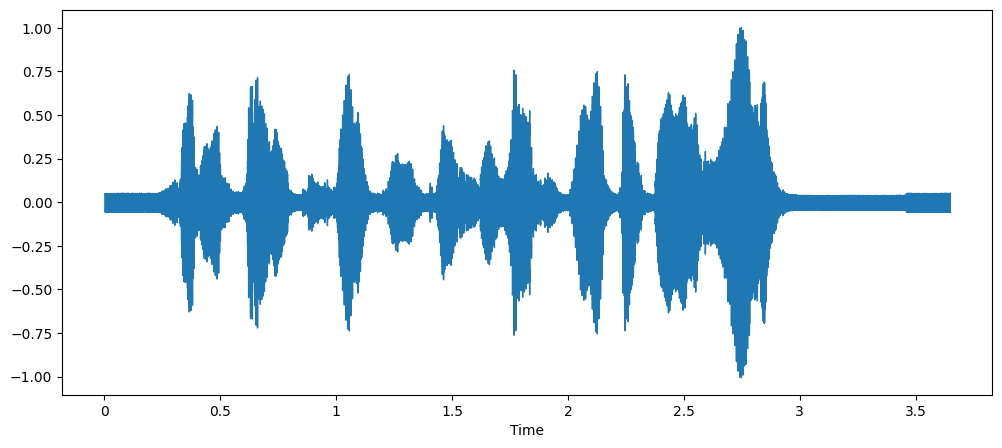

In [46]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

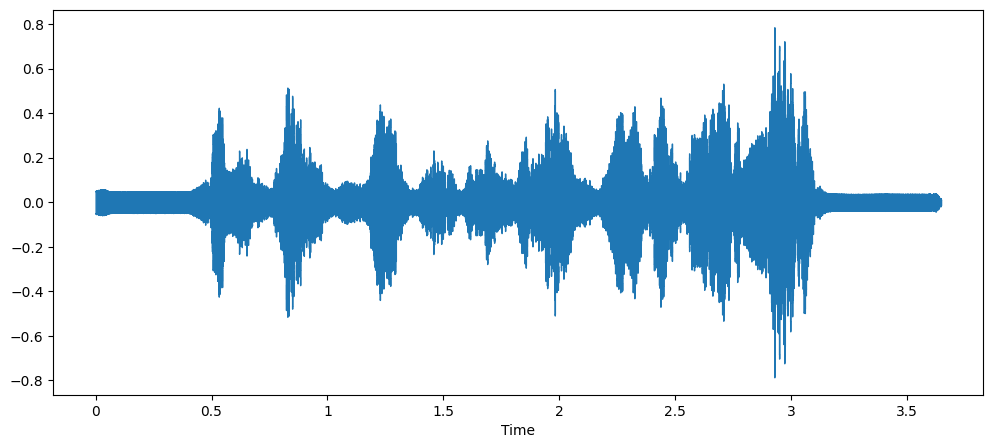

In [47]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

# Feature extraction

In [48]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data)
    #rmse=librosa.feature.rms(data,frame_length,hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    #mfcc=librosa.feature.mfcc(data,sr=sr)
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result = np.array([])
    
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                        ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio


In [49]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


# Normal way to get features

In [50]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

2it [00:00, 11.99it/s]

0 audio has been processed


502it [00:53,  9.34it/s]

500 audio has been processed


1003it [01:46, 10.06it/s]

1000 audio has been processed


1503it [02:32, 13.15it/s]

1500 audio has been processed


2003it [03:13, 11.84it/s]

2000 audio has been processed


2503it [03:52, 13.28it/s]

2500 audio has been processed


3003it [04:28, 12.77it/s]

3000 audio has been processed


3502it [05:06, 14.06it/s]

3500 audio has been processed


4003it [05:44, 12.65it/s]

4000 audio has been processed


4501it [06:23, 11.91it/s]

4500 audio has been processed


5002it [07:01, 11.96it/s]

5000 audio has been processed


5503it [07:50, 12.08it/s]

5500 audio has been processed


6003it [08:29, 11.95it/s]

6000 audio has been processed


6503it [09:08, 11.73it/s]

6500 audio has been processed


7003it [09:49, 13.68it/s]

7000 audio has been processed


7503it [10:30, 13.14it/s]

7500 audio has been processed


8002it [11:12, 12.60it/s]

8000 audio has been processed


8502it [11:56,  9.00it/s]

8500 audio has been processed


9003it [12:42, 15.11it/s]

9000 audio has been processed


9503it [13:22, 12.30it/s]

9500 audio has been processed


10001it [14:03, 12.15it/s]

10000 audio has been processed


10503it [14:48, 10.34it/s]

10500 audio has been processed


11002it [15:29, 12.22it/s]

11000 audio has been processed


11503it [16:11, 11.06it/s]

11500 audio has been processed


12001it [17:55,  3.89it/s]

12000 audio has been processed


12162it [18:15, 11.10it/s]

Done
Time:  1095.414745499962


# Faster way to get features
***Parallel way***

**Dont be afraid from red lines that Normal**


This code is an example of how to use the joblib library to process multiple audio files in parallel using the process_feature function. The code also uses the timeit library to measure the time taken to process the audio files.

Here's a breakdown of what the code does:

The from joblib import Parallel, delayed statement imports the Parallel and delayed functions from the joblib library.
The start = timeit.default_timer() statement starts a timer to measure the time taken to process the audio files.
The process_feature function processes a single audio file by extracting its features using the get_feat function and appending the corresponding X and Y values to the X and Y lists.
The paths and emotions variables extract the paths and emotions from the data_path DataFrame.
The Parallel function runs the process_feature function in parallel for each audio file using the delayed function to wrap the process_feature function.
The results variable contains the X and Y values for each audio file.
The X and Y lists are populated with the X and Y values from each audio file using the extend method.
The stop = timeit.default_timer() statement stops the timer.
The print('Time: ', stop - start) statement prints the time taken to process the audio files.
Overall, this code demonstrates how to use the joblib library to process multiple audio files in parallel, which can significantly reduce the processing time for large datasets.This code is an example of how to use the joblib library to process multiple audio files in parallel using the process_feature function. The code also uses the timeit library to measure the time taken to process the audio files.

Here's a breakdown of what the code does:

The from joblib import Parallel, delayed statement imports the Parallel and delayed functions from the joblib library.
The start = timeit.default_timer() statement starts a timer to measure the time taken to process the audio files.
The process_feature function processes a single audio file by extracting its features using the get_feat function and appending the corresponding X and Y values to the X and Y lists.
The paths and emotions variables extract the paths and emotions from the data_path DataFrame.
The Parallel function runs the process_feature function in parallel for each audio file using the delayed function to wrap the process_feature function.
The results variable contains the X and Y values for each audio file.
The X and Y lists are populated with the X and Y values from each audio file using the extend method.
The stop = timeit.default_timer() statement stops the timer.
The print('Time: ', stop - start) statement prints the time taken to process the audio files.
Overall, this code demonstrates how to use the joblib library to process multiple audio files in parallel, which can significantly reduce the processing time for large datasets.

*  The .extend() method increases the length of the list by the number of elements that are provided to the method, so if you want to add multiple elements to the list, you can use this method.

In [51]:
warnings.filterwarnings("ignore")

from joblib import Parallel, delayed
import timeit

start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = data_path.Path
emotions = data_path.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)    


Time:  570.9342011999688


In [52]:
len(X), len(Y), data_path.Path.shape


(48648, 48648, (12162,))

# Saving features

In [53]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.260254,0.388184,0.509277,0.506836,0.498535,0.492676,0.494629,0.497559,0.503906,0.510742,...,2.929754,7.878901,4.039987,3.399346,1.260428,1.040015,-5.672204,-2.705883,-2.031647,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.264160,0.390137,0.510742,0.513184,0.495117,0.495117,0.500488,0.508301,0.508789,0.520020,...,-2.258589,-4.040561,2.263060,1.921746,-0.000509,1.964451,3.046255,-0.317376,2.926748,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [54]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.260254,0.388184,0.509277,0.506836,0.498535,0.492676,0.494629,0.497559,0.503906,0.510742,...,2.929754,7.878901,4.039987,3.399346,1.260428,1.040015,-5.672204,-2.705883,-2.031647,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.264160,0.390137,0.510742,0.513184,0.495117,0.495117,0.500488,0.508301,0.508789,0.520020,...,-2.258589,-4.040561,2.263060,1.921746,-0.000509,1.964451,3.046255,-0.317376,2.926748,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [55]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [56]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(48648, 2377)

In [57]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

# Data preparation

In [58]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [59]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [60]:
print(Y.shape)
X.shape

(48648, 7)


(48648, 2376)

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [62]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [24]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

NameError: name 'x_train' is not defined

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

> Applying early stopping for all models


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint(
    'best_model1_weights.keras',  # Update this line to use the '.keras' extension
    monitor='val_accuracy',
    save_best_only=True
)
#model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:

# early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1, restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

# LSTM Model

Model that have lstm layers take alot of time if you have much free time enjoy with it

In [ ]:
"""model01=Sequential()
model01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.3))
model01.add(LSTM(128))
#model01.add(Dropout(0.3))
model01.add(Dense(7,activation = 'softmax'))
model01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model01.summary()"""

"model01=Sequential()\nmodel01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))\nmodel01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.3))\nmodel01.add(LSTM(128))\n#model01.add(Dropout(0.3))\nmodel01.add(Dense(7,activation = 'softmax'))\nmodel01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])\nmodel01.summary()"

In [ ]:
"""hist=model01.fit(X_train, y_train,
            epochs=20,
            validation_data=(X_test, y_test),batch_size=64,
            verbose=1)"""

'hist=model01.fit(X_train, y_train,\n            epochs=20,\n            validation_data=(X_test, y_test),batch_size=64,\n            verbose=1)'

In [ ]:
"""print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()"""

'print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")\nepochs = [i for i in range(20)]\nfig , ax = plt.subplots(1,2)\ntrain_acc = hist.history[\'accuracy\']\ntrain_loss = hist.history[\'loss\']\ntest_acc = hist.history[\'val_accuracy\']\ntest_loss = hist.history[\'val_loss\']\n\nfig.set_size_inches(20,6)\nax[0].plot(epochs , train_loss , label = \'Training Loss\')\nax[0].plot(epochs , test_loss , label = \'Testing Loss\')\nax[0].set_title(\'Training & Testing Loss\')\nax[0].legend()\nax[0].set_xlabel("Epochs")\n\nax[1].plot(epochs , train_acc , label = \'Training Accuracy\')\nax[1].plot(epochs , test_acc , label = \'Testing Accuracy\')\nax[1].set_title(\'Training & Testing Accuracy\')\nax[1].legend()\nax[1].set_xlabel("Epochs")\nplt.show()'

# CNN model

In [ ]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((38918, 2376, 1), (38918, 7), (9730, 2376, 1), (9730, 7))

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         3,59

 Total params: 7,193,223 (27.44 MB)

 Trainable params: 7,188,871 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [ ]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])
model.save('emotion_recognition_model_97-acc_afterChanging.h5')

Epoch 1/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 4703s 8s/step - accuracy: 0.5432 - loss: 1.1638 - val_accuracy: 0.5274 - val_loss: 1.2104 - learning_rate: 0.0010
Epoch 2/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 4389s 7s/step - accuracy: 0.6106 - loss: 1.0035 - val_accuracy: 0.5705 - val_loss: 1.1523 - learning_rate: 0.0010
Epoch 3/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 4238s 7s/step - accuracy: 0.6451 - loss: 0.9197 - val_accuracy: 0.6394 - val_loss: 0.9491 - learning_rate: 0.0010
Epoch 4/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 4300s 7s/step - accuracy: 0.6971 - loss: 0.7917 - val_accuracy: 0.6134 - val_loss: 1.0397 - learning_rate: 0.0010
Epoch 5/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 4583s 8s/step - accuracy: 0.7047 - loss: 0.7831 - val_accuracy: 0.7346 - val_loss: 0.7172 - learning_rate: 0.0010
Epoch 6/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 4502s 7s/step - accuracy: 0.8028 - loss: 0.5405 - val_accuracy: 0.7612 - val_loss: 0.6759 - learning_rate: 0.0010
Epoch 7/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 4847s 8s/step - accuracy: 0.8247 - l

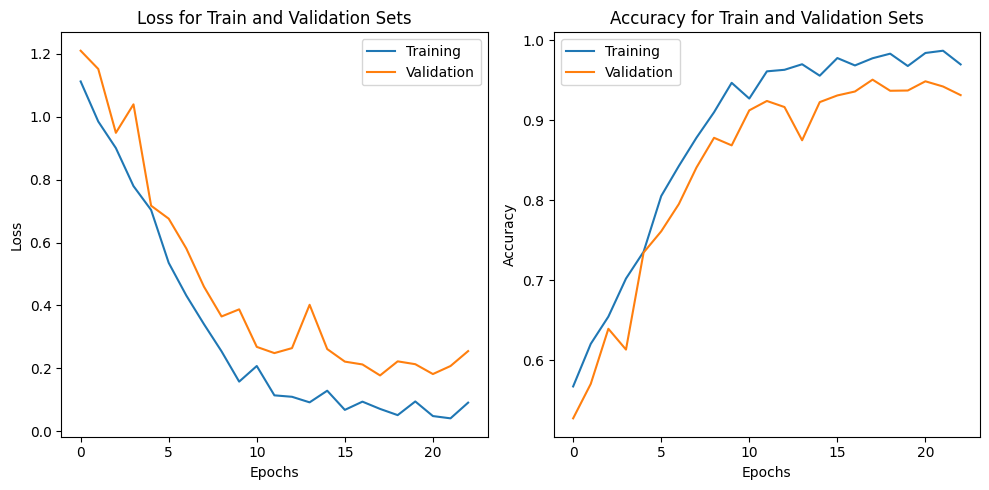

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

305/305 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.9484 - loss: 0.1773
Accuracy of our model on test data :  95.06680369377136 %


ValueError: x and y must have same first dimension, but have shapes (50,) and (23,)

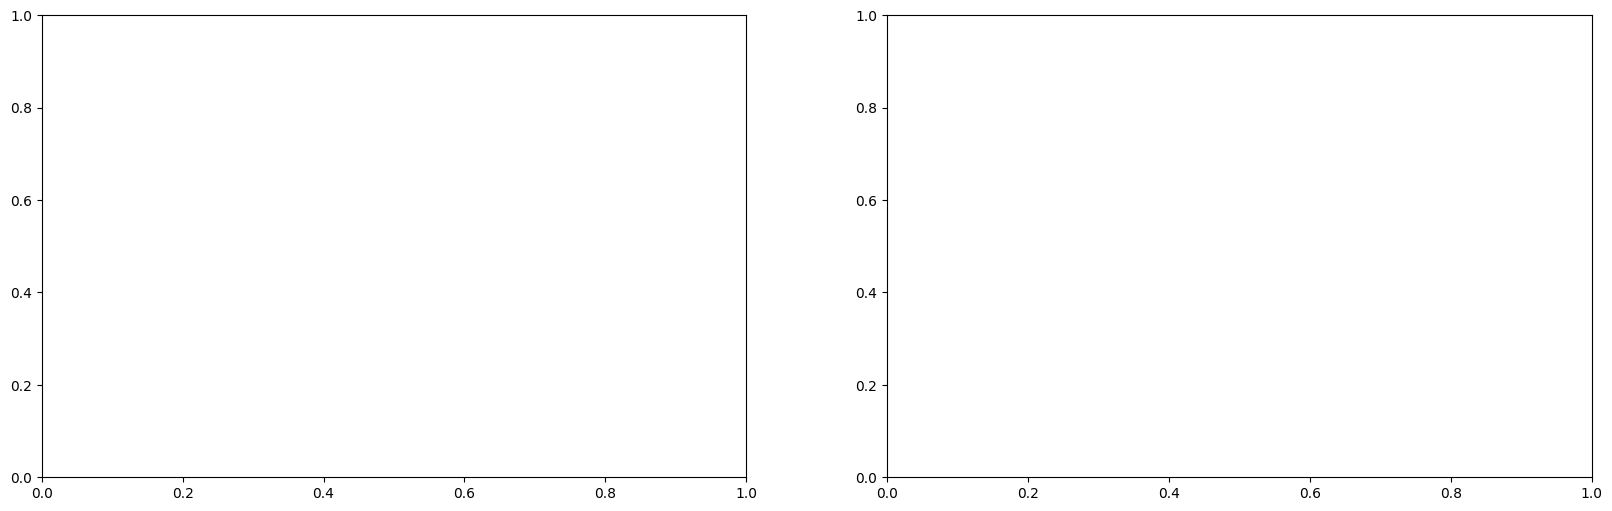

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

305/305 ━━━━━━━━━━━━━━━━━━━━ 267s 874ms/step


,Predicted Labels,Actual Labels
0,neutral,neutral
1,disgust,disgust
2,fear,fear
3,angry,angry
4,fear,fear
5,angry,angry
6,angry,angry
7,fear,fear
8,angry,angry
9,fear,fear


In [ ]:
df0

,Predicted Labels,Actual Labels
0,neutral,neutral
1,disgust,disgust
2,fear,fear
3,angry,angry
4,fear,fear
...,...,...
9725,angry,angry
9726,sad,sad
9727,neutral,neutral
9728,sad,sad


Some plots of multi_model
______________________________________________


# CLSTM Model

Model that have lstm layers take alot of time if you have much free time enjoy with it

Another  model (CLSTM)  omnia model
_____________________________________________________

In [ ]:
#Build the model

# define model
"""model000 = Sequential()
model000.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

          
model000.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

model000.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))
          
model000.add(LSTM(128, return_sequences=True)) 
model000.add(Dropout(0.3))

model000.add(LSTM(128, return_sequences=True)) 
model000.add(Dropout(0.3))
model000.add(LSTM(128))
model000.add(Dropout(0.3))

model000.add(Dense(128, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(64, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(32, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(7, activation='softmax'))



model000.summary()"""

"model000 = Sequential()\nmodel000.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))\nmodel000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))\nmodel000.add(BatchNormalization())\nmodel000.add(Dropout(0.3))\n\n          \nmodel000.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))\nmodel000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))\nmodel000.add(BatchNormalization())\nmodel000.add(Dropout(0.3))\n\nmodel000.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))\nmodel000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))\nmodel000.add(BatchNormalization())\nmodel000.add(Dropout(0.3))\n          \nmodel000.add(LSTM(128, return_sequences=True)) \nmodel000.add(Dropout(0.3))\n\nmodel000.add(LSTM(128, return_sequences=True)) \nmodel000.add(Dropout(0.3))\nmodel000.add(LSTM(128))\nmodel000.add(Dropout(0.3))\n\nmodel000.add(Dense(128, activatio

In [ ]:
"""from keras.utils.vis_utils import plot_model
plot_model( model000, show_shapes=True, show_layer_names=True, to_file='model000.png')"""

"from keras.utils.vis_utils import plot_model\nplot_model( model000, show_shapes=True, show_layer_names=True, to_file='model000.png')"

In [ ]:
"""model000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])"""

"model000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])"

In [ ]:
"""hist1=model000.fit(x_traincnn, y_train, batch_size=64, epochs=40, validation_data=(x_testcnn, y_test))"""

'hist1=model000.fit(x_traincnn, y_train, batch_size=64, epochs=40, validation_data=(x_testcnn, y_test))'

In [ ]:
"""print("Accuracy of our model on test data : " , model000.evaluate(x_testcnn,y_test)[1]*100 , "%")
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = hist1.history['accuracy']
train_loss = hist1.history['loss']
test_acc = hist1.history['val_accuracy']
test_loss = hist1.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()"""

'print("Accuracy of our model on test data : " , model000.evaluate(x_testcnn,y_test)[1]*100 , "%")\nepochs = [i for i in range(40)]\nfig , ax = plt.subplots(1,2)\ntrain_acc = hist1.history[\'accuracy\']\ntrain_loss = hist1.history[\'loss\']\ntest_acc = hist1.history[\'val_accuracy\']\ntest_loss = hist1.history[\'val_loss\']\n\nfig.set_size_inches(20,6)\nax[0].plot(epochs , train_loss , label = \'Training Loss\')\nax[0].plot(epochs , test_loss , label = \'Testing Loss\')\nax[0].set_title(\'Training & Testing Loss\')\nax[0].legend()\nax[0].set_xlabel("Epochs")\n\nax[1].plot(epochs , train_acc , label = \'Training Accuracy\')\nax[1].plot(epochs , test_acc , label = \'Testing Accuracy\')\nax[1].set_title(\'Training & Testing Accuracy\')\nax[1].legend()\nax[1].set_xlabel("Epochs")\nplt.show()'

In [ ]:
# predicting on test data.
"""pred_test00 = model000.predict(x_testcnn)
y_pred00 = encoder.inverse_transform(pred_test)
y_test00 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred00.flatten()
df0['Actual Labels'] = y_test00.flatten()

df0.head(10)"""

"pred_test00 = model000.predict(x_testcnn)\ny_pred00 = encoder.inverse_transform(pred_test)\ny_test00 = encoder.inverse_transform(y_test)\n\n# Check for random predictions\ndf0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])\ndf0['Predicted Labels'] = y_pred00.flatten()\ndf0['Actual Labels'] = y_test00.flatten()\n\ndf0.head(10)"

# Evalutation

Results of best model

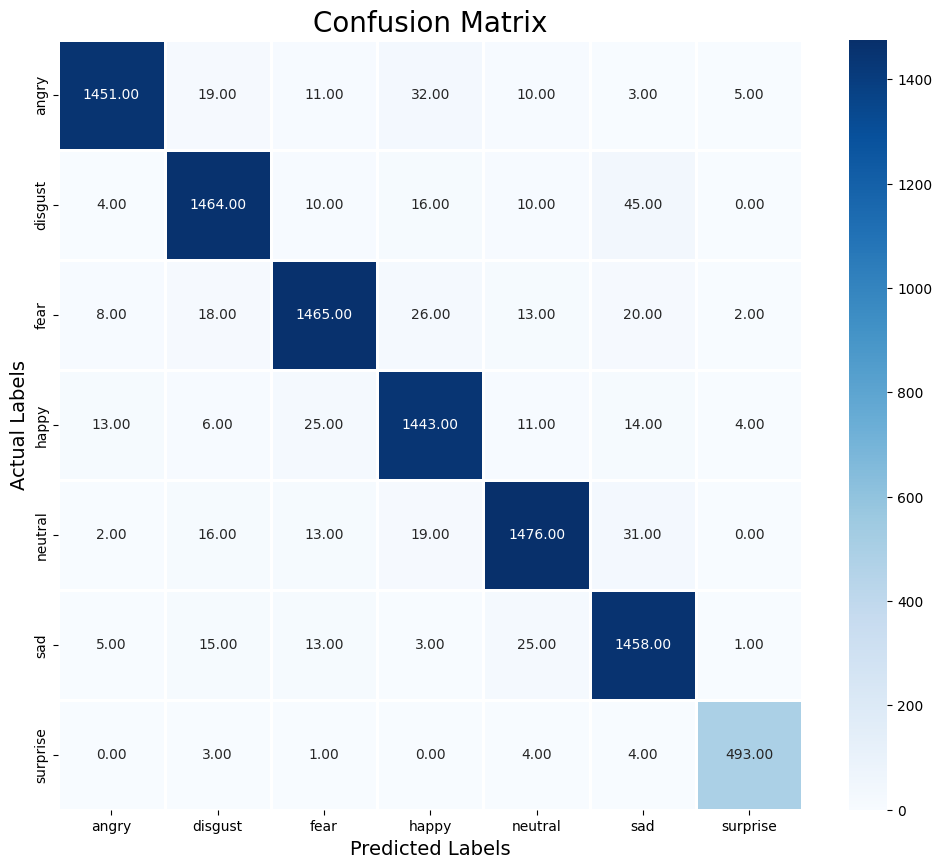

              precision    recall  f1-score   support

       angry       0.98      0.95      0.96      1531
     disgust       0.95      0.95      0.95      1549
        fear       0.95      0.94      0.95      1552
       happy       0.94      0.95      0.94      1516
     neutral       0.95      0.95      0.95      1557
         sad       0.93      0.96      0.94      1520
    surprise       0.98      0.98      0.98       505

    accuracy                           0.95      9730
   macro avg       0.95      0.95      0.95      9730
weighted avg       0.95      0.95      0.95      9730



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

# Saving Best Model

In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights.weights.h5")
print("Saved model to disk") 

Saved model to disk


In [ ]:
# Assuming 'model_file.h5' exists and contains your model
loaded_model = keras.models.load_model('emotion_recognition_model_97-acc_afterChanging.h5')
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

305/305 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9484 - loss: 0.1773
compile_metrics: 95.07%


In [ ]:
# model.save('my_new_model_1!.keras')
# keras.saving.save_model(model, 'my_new_model_2!.keras')

# Saving and Loading our Stnadrad Scaler and encoder
* To save the StandardScaler object to use it later in a Flask API

pickle file


In [64]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")    

Done


# Test script
* That can predict new record 

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model2.load_weights("best_model1_weights.weights.h5")
print("Loaded model from disk")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'best_model1_weights.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [65]:
import pickle

with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)
    
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")    

Done


In [66]:
import librosa

In [67]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data)

    return np.squeeze(rmse)

def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):

    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [68]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result) 
    final_result=np.expand_dims(i_result, axis=2)
    
    return final_result

In [69]:
res=get_predict_feat("../speech/Actor_01/03-01-07-01-01-01-01.wav")
print(res.shape)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [74]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model2.predict(res)
    print(predictions)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])  

def predictionWithText(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model2.predict(res)
    print(predictions)
    predText = predictionText()
    predictionWithText = predText + predictions
    print(predictionWithText)
    y_pred = encoder2.inverse_transform(predictionWithText)
    print(y_pred[0][0])    

In [75]:
prediction("../speech/Actor_02/03-01-01-01-01-01-02.wav")

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
prediction("../speech/Actor_01/03-01-01-01-01-01-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
neutral


In [ ]:
prediction("../speech/Actor_01/03-01-05-01-02-02-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
angry


In [ ]:
prediction("../speech/Actor_21/03-01-04-02-02-02-21.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
sad


In [ ]:
prediction("../speech/Actor_02/03-01-06-01-02-02-02.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
fear


In [ ]:
prediction("../speech/Actor_01/03-01-08-01-01-01-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
surprise


In [ ]:
prediction("../speech/Actor_01/03-01-07-01-01-01-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
disgust


In [72]:
predictionWithText("../עטרה אוריה -  ילד מטריה (128kbps).wav")

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [73]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}

from tensorflow.keras.models import model_from_json

# טעינת מבנה המודל מהקובץ JSON
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json)

# טעינת משקלים למודל
loaded_model2.load_weights("CNN_model_weights.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:

import speech_recognition as sr
from pydub import AudioSegment

# פונקציה להמרת קבצי MP3 ל-WAV
def convert_mp3_to_wav(mp3_file):
    # קריאת הקובץ MP3
    audio = AudioSegment.from_mp3(mp3_file)

    # שמירת הקובץ בפורמט WAV
    wav_file = os.path.splitext(mp3_file)[0] + ".wav"
    audio.export(wav_file, format="wav")

    return wav_file

# פונקציה להמרת קובץ אודיו לטקסט
def audio_to_text(audio_file):
    # בדיקה אם הקובץ הוא MP3 והמרתו ל-WAV אם כן
    if audio_file.endswith(".mp3"):
        audio_file = convert_mp3_to_wav(audio_file)

    # יצירת מופע של המחלקה לקליטת קול
    recognizer = sr.Recognizer()

    # הקריאה לקובץ אודיו
    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source)  # קריאת הנתונים הקוליים

    try:
        # המרה של הקול לטקסט באמצעות שירותי קול ברשת
        text = recognizer.recognize_google(audio_data, language='he-IL')  # הזדהות עם הדיבור באמצעות הגוגל דיבור
        return text
    except sr.UnknownValueError:
        return "לא הצלחתי להבין את הדיבור"
    except sr.RequestError as e:
        return f"שגיאה בשירות: {e}"

# דוגמה לשימוש:
# audio_file = "ילד מטריה.mp3"
# audio_file="C:\\Users\\רוט\\Downloads\\Music\\new\\שי המבר פעם את לילה.mp3"
audio_file="../עטרה אוריה -  ילד מטריה (128kbps).wav"
result = audio_to_text(audio_file)
print(result)


היי הייתי ילד אחד ביסודי שאני זוכרת אותו יותר טוב מכולם לא בגלל שהוא היה הכי יפה לא בגלל שהוא היה הכי חכם בחורף הוא היה לובש חולצות קצרות בקיץ מעילים ומטריות מה יש לך למה לעצבן למה לעשות סתם את המשקפיים שלו הוא הדביק עם סלוטייפ אחרי ששברו לו אותם בהפסקה והקלמרים עליו הוא צחק איתם תראו את הדביל הזה איזה מטומטם ובגלל שאף אחד לא הסכים לשבת לידו לא רצו לראות אותו אז המורה אמרה אין ברירה נשיב אותו עם הילדה המוזרה הזאת שלא רוצים אותה זאת שלא רואים אותה זאת שאף אחד לא משחק איתה וככה הם ישבו להם בסוף של הכיתה ילדה עם קוקיות ילד מטריה נעים מאוד השם שלי זה עומר נעים מאוד קוראים לי עטרה בחוץ הילדים רוצים צועקים אחד על השני כדורים עפים בפנים זה רק אני ועומר ועומר הוא אומר שלום לא מצייר לי ציורים עושה לי פרצופים פותר לי תרגילים וכשאני בוכה רוצה לשבור את הכלים אומר מחבק אותי שני בנים דוחפים לו הרגל לא נופל על הפנים הלוואי שתעלם הם אומרים והוא סוטה מחזיק חזק בפנים ורק שהם הולכים עומר נאמן מנהרת הבגדים מרכיב את משקפיים ונהיה לו קצת רטוב אז הוא פותח מטריה רוכש לאלוהים אם אתה קיים תעשה לי איזה נס ותיקח 

In [ ]:
from googletrans import Translator

def translate_text(text):
    translator = Translator()
    translation = translator.translate(text, src='he', dest='en')
    return translation.text

# טקסט לדוגמה בעברית
# hebrew_text = "זהו דוגמה לטקסט בעברית שנרצה לתרגם לאנגלית."
hebrew_text=result
# תרגום הטקסט לאנגלית
english_translation = translate_text(hebrew_text)
print("תרגום לאנגלית:")
print(english_translation)

תרגום לאנגלית:
Hey I was one elementary kid that I remember better than everyone because he was the most beautiful not because he was the smartest in winter he would wear short shirts in the summer coats and umbrellas what you have why to annoy why to do his glasses he pastes with Seltip after breaking himThem at the break and the cubs on him he laughed with them you will see this depletion some dumb and because no one agreed to sit next to him to see him so the teacher said there was no choice we would return him with this strange girl who did not want it to see it that no one plays with her and so they are with herThey sat at the end of the class girl with a very pleasant umbrella cooky my name is Omar very pleasant call me the kids want to shout at each other flying balls inside is only me and Omar and Omar he says Hello not painting me paintings makes me faces to me and when ICryle wants to break the tools saying hugging me two boys pushing him the leg does not fall on the sidewalk

In [63]:
from transformers import pipeline

# יצירת ה-pipeline לסיווג רגשות
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# טקסט לדוגמה
#text = "i am a good girl, i love everyone"
text = english_translation

# סיווג הרגש בטקסט
results = emotion_classifier(text)

# הצגת התוצאות
for result in results:
    for label_result in result:
        print(f"Label: {label_result['label']}, Score: {label_result['score']:.4f}")

emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
textPred = np.array([results[0][4]['score'], results[0][4]['score'], results[0][3]['score'], 
                     results[0][5]['score'], results[0][0]['score'], results[0][2]['score'], 
                     results[0][1]['score'], results[0][6]['score']])

print(textPred)

# הדפסת ה-label עם ה-score הגבוה ביותר
max_score = max(result['score'] for result in results[0])
max_result = [res for res in results[0] if res['score'] == max_score]
print(f"Label with highest score: {max_result[0]['label']}, Score: {max_result[0]['score']:.4f}")

def predictionText():
    return textPred

Label: anger, Score: 0.2285
Label: disgust, Score: 0.0296
Label: fear, Score: 0.0049
Label: joy, Score: 0.0501
Label: neutral, Score: 0.4495
Label: sadness, Score: 0.0334
Label: surprise, Score: 0.2041
[0.44946516 0.44946516 0.05005528 0.03339142 0.22845855 0.0049234
 0.02963736 0.20406887]
Label with highest score: neutral, Score: 0.4495
